#### Descripcion del DataFrame<br>

Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa.<br>
Las campañas de marketing se basaban en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente
para saber si el producto (depósito a plazo fijo bancario) estaría (o no) suscrito<br>

**target: conocer si el cliente suscribira un deposito a plazo**

#### datos del cliente bancario:<br>
1 - edad (numérico)<br>
2 - empleo: tipo de trabajo (categórico: "administrador", "desconocido", "desempleado", "gerente", "empleado doméstico", "empresario", "estudiante",
"obrero", "autónomo", "jubilado", "técnico", "servicios")<br>
3 - estado civil: estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" significa divorciado o viudo)<br>
4 - educación (categórico: "desconocido", "secundario", "primario", "terciario" (este ultimo se considera cualquier tipo de educacion superior despues de la secundaria, como universidad por ejemplo")<br>
5 - impago: ¿tiene crédito en mora? (binario: "sí", "no")<br>
6 - saldo: saldo medio anual, en euros (numérico)(es el saldo promedio que maneja cada cliente en funcion de su actividad financiera, con base en sus gastos e ingresos, promediado anualmente, en este caso, considerar esta variable para realizar la prediccion de los clientes que adquieren un credito y  los que no)<br>
7 - vivienda: ¿tiene préstamo hipotecario? (binario: "sí", "no")<br>
8 - préstamo: ¿tiene préstamo personal? (binario: "sí", "no")<br>
9 - contacto: tipo de comunicación del contacto (categórico: "desconocido", "teléfono", "celular")<br>
10 - día: último día del mes del contacto (numérico)<br>
11 - mes: último mes del año del contacto (categórico: "ene", "feb", "mar", …, "nov", "dic")<br>
12 - duración: duración del último contacto, en segundos (numérico)<br>
13 - campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)<br>
14 - pdays: número de días transcurridos desde la última vez que se contactó al cliente de una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)<br>
15 - anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)<br>
16 - poutcome: resultado de la campaña de marketing anterior (categórico: "desconocido", "otro", "fracaso", "éxito")<br>

Variable de salida (objetivo deseado):<br>
17 - y - ¿ha suscrito el cliente un depósito a plazo? (binario: "sí", "no")<br>

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as DecissionTreeClassifier
from sklearn.metrics import mean_squared_error #Evalua desempeño elevando al cuadrado los errores, penaliza mas los errores grandes
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score #mide que tan bien un modelo de regresion explica la variabilidad de los datos
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

# PENDIENTE INSTALAR import lightgbm as lgb

In [2]:
banco = pd.read_csv(r'E:\TRIPLETEN\bank-full.csv', sep=';')

Archivo original, con separadores punto y coma puntuales, se hace limpieza

In [3]:
banco.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
banco.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


Renombramos algunas columnas para tener mas claro con que estamos trabajando

In [5]:
banco = banco.rename(columns={'default':'impago', 'balance':'saldo','housing':'vivienda','loan':'prestamo_personal','poutcome':'resultado_campaña','y':'dep_plazo'})

In [6]:
banco.head(2)

,age,job,marital,education,impago,saldo,vivienda,prestamo_personal,contact,day,month,duration,campaign,pdays,previous,resultado_campaña,dep_plazo
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [7]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   job                45211 non-null  object
 2   marital            45211 non-null  object
 3   education          45211 non-null  object
 4   impago             45211 non-null  object
 5   saldo              45211 non-null  int64 
 6   vivienda           45211 non-null  object
 7   prestamo_personal  45211 non-null  object
 8   contact            45211 non-null  object
 9   day                45211 non-null  int64 
 10  month              45211 non-null  object
 11  duration           45211 non-null  int64 
 12  campaign           45211 non-null  int64 
 13  pdays              45211 non-null  int64 
 14  previous           45211 non-null  int64 
 15  resultado_campaña  45211 non-null  object
 16  dep_plazo          45211 non-null  objec

In [8]:
banco.shape

(45211, 17)

In [9]:
edad = banco.groupby('age')['job'].value_counts().reset_index()
filtro = edad[(edad['job']=='retired')&(edad['age']<70)&(edad['age']>49)]
top_10 = filtro.sort_values(by='count', ascending=False).head(10)

Text(0, 0.5, 'cantidad')

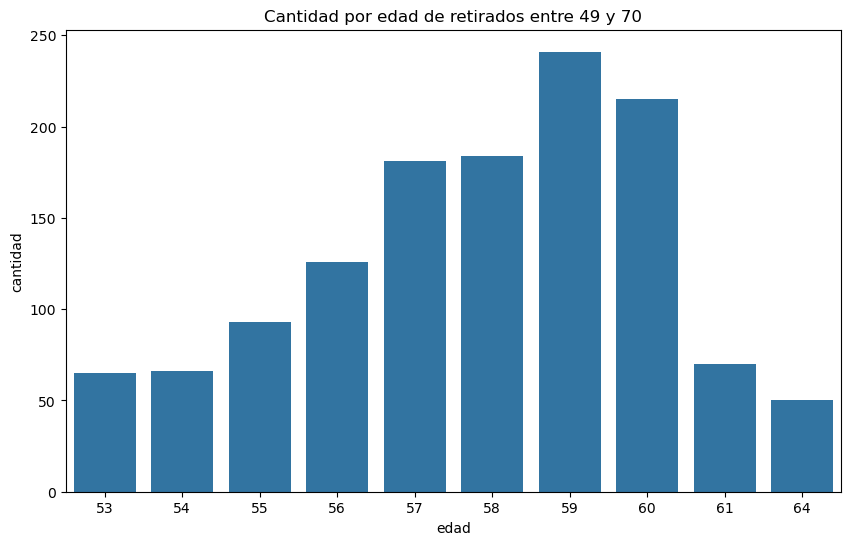

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10, x='age', y='count')
plt.title('Cantidad por edad de retirados entre 49 y 70')
plt.xlabel('edad')
plt.ylabel('cantidad')

In [11]:
edad = banco.groupby('age')['job'].value_counts().reset_index().sort_values(by='count', ascending=False)
sin_retirados = edad[edad['job']!='retired']
sin_retirados.tail()

,age,job,count
542,71,management,1
541,71,entrepreneur,1
496,64,unemployed,1
32,23,self-employed,1
493,64,blue-collar,1


In [12]:
sin_retirados.describe()

,age,count
count,530.000000,530.000000
mean,45.726415,81.032075
std,15.474067,107.347945
min,18.000000,1.000000
25%,33.000000,6.000000
50%,45.000000,37.500000
75%,58.000000,112.000000
max,84.000000,507.000000


Agrupamos por tipo de trabajo y segmentamos por edad, contabilizando por tipo de trabajo, con ello podemos ver la tendencia del sector que produce mas y a quien es que se le podria estar ofreciendo mayor cantidad de creditos

In [13]:
edad = banco.groupby('job')['age'].value_counts().reset_index().sort_values(by='count', ascending=False)
conteo_job = edad[edad['count']>100]
conteo_job.head(10)

,job,age,count
203,management,33,507
204,management,32,498
205,management,34,484
206,management,31,478
207,management,35,465
449,technician,32,464
208,management,30,445
209,management,36,443
50,blue-collar,32,436
51,blue-collar,35,428


#### Grafico de barras agrupadas por edades y tipo de trabajo

Se considera una muestra considerando las actividades que cuenten con mas de 100 registros con base en la edad

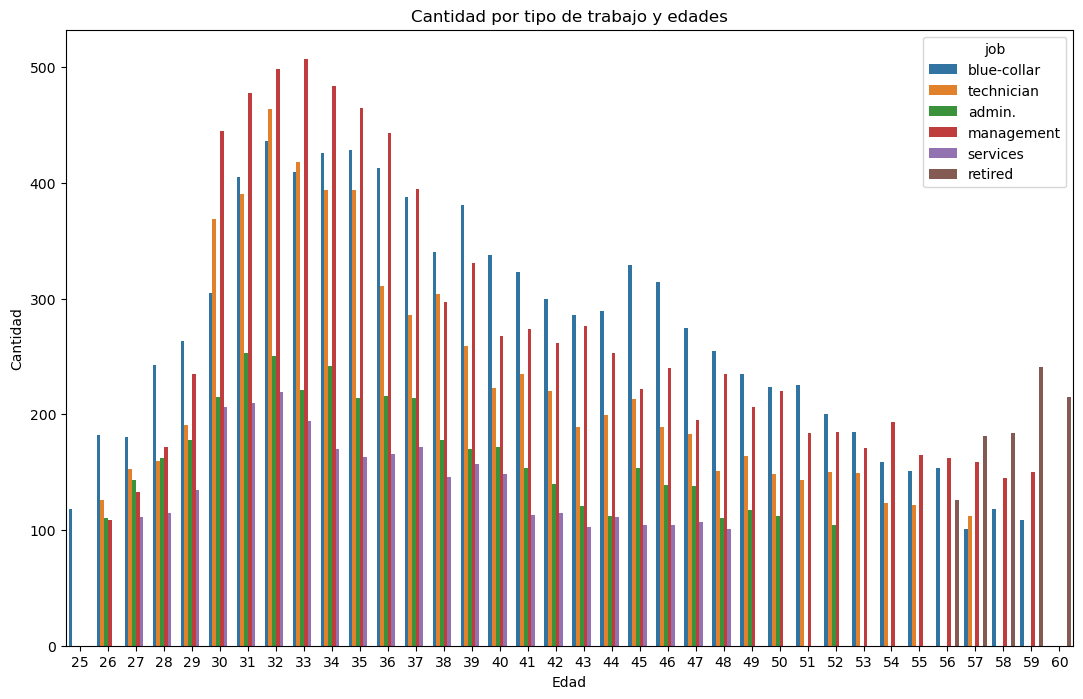

In [14]:
plt.figure(figsize=(13,8))
sns.barplot(data=conteo_job, x='age', y='count', hue='job', dodge=True)
plt.title('Cantidad por tipo de trabajo y edades')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

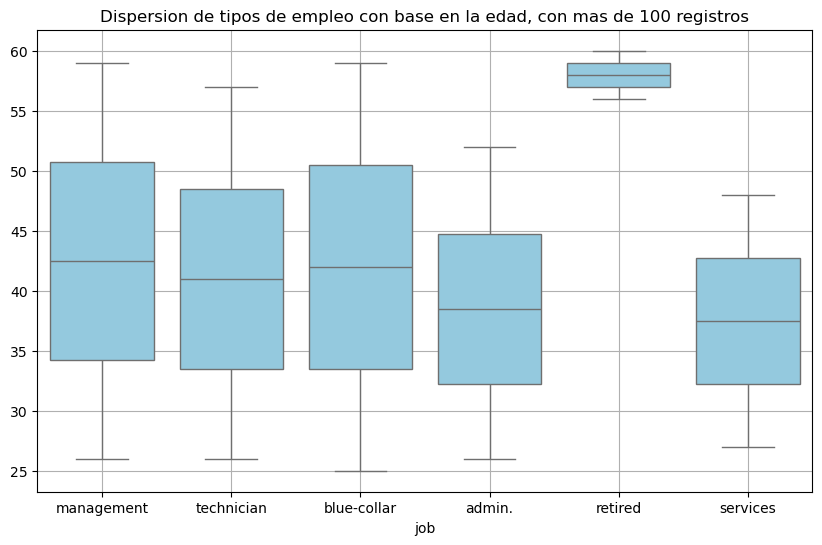

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(data=conteo_job, x='job',y='age', color='skyblue')
plt.title('Dispersion de tipos de empleo con base en la edad, con mas de 100 registros')
plt.ylabel('')
plt.grid()
plt.show()

In [16]:
banco['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='job'>

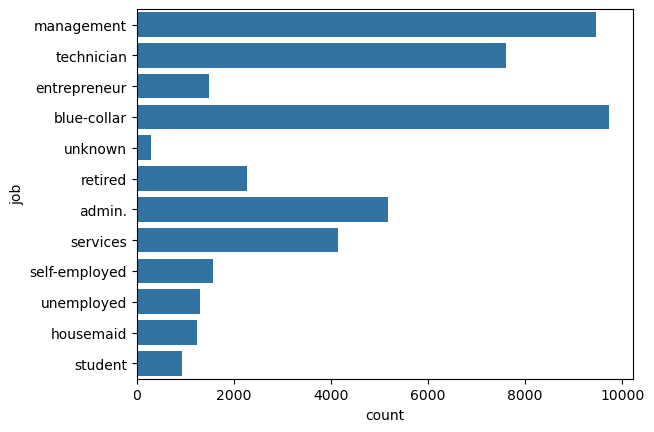

In [17]:
sns.countplot(banco['job'])

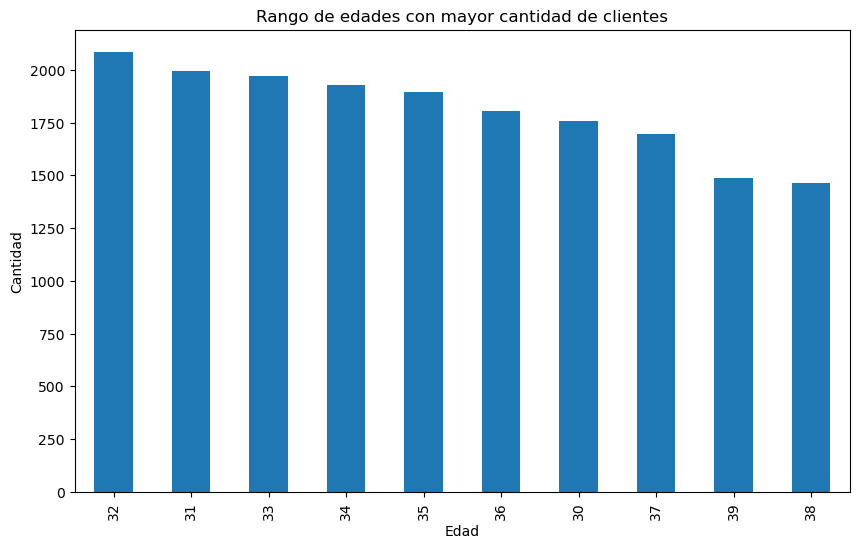

In [18]:
banco['age'].value_counts().head(10).plot(kind='bar', figsize=(10,6))
plt.title('Rango de edades con mayor cantidad de clientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

In [19]:
saldo = banco.groupby('marital')['saldo'].value_counts().reset_index().sort_values(by='count', ascending=False)
status_saldo = saldo[(saldo['saldo']>=4000)&(saldo['marital']=='married')]
status_saldo.sort_values(by='saldo', ascending=False)

#filtro = edad[(edad['job']=='retired')&(edad['age']<70)&(edad['age']>49)]

,marital,saldo,count
8076,married,98417,1
5781,married,81204,2
8075,married,71188,1
8074,married,66653,1
8073,married,64343,1
...,...,...,...
4096,married,4007,4
6765,married,4006,1
6764,married,4005,1
5442,married,4004,2


Separamos por nivel educativo, estado civil y estado hipotecario

In [20]:
banco.head(2)

,age,job,marital,education,impago,saldo,vivienda,prestamo_personal,contact,day,month,duration,campaign,pdays,previous,resultado_campaña,dep_plazo
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [21]:
hipoteca2 = banco.groupby('marital')[['education','vivienda']].value_counts().sort_values(ascending=False)
hipoteca2

marital   education  vivienda
married   secondary  yes         8431
                     no          5339
single    secondary  yes         3903
married   tertiary   no          3702
                     yes         3336
          primary    yes         3024
single    secondary  no          2714
          tertiary   no          2503
                     yes         2289
married   primary    no          2222
divorced  secondary  yes         1704
                     no          1111
          tertiary   yes          753
                     no           718
married   unknown    no           630
                     yes          530
single    primary    yes          504
divorced  primary    no           386
                     yes          366
single    primary    no           349
          unknown    no           322
                     yes          206
divorced  unknown    no            85
                     yes           84
Name: count, dtype: int64

In [22]:
hipoteca3 = banco.groupby(['marital','education','vivienda']).size().reset_index(name='count').sort_values(by='count', ascending=False)
hipoteca3.head(10)

,marital,education,vivienda,count
11,married,secondary,yes,8431
10,married,secondary,no,5339
19,single,secondary,yes,3903
12,married,tertiary,no,3702
13,married,tertiary,yes,3336
9,married,primary,yes,3024
18,single,secondary,no,2714
20,single,tertiary,no,2503
21,single,tertiary,yes,2289
8,married,primary,no,2222


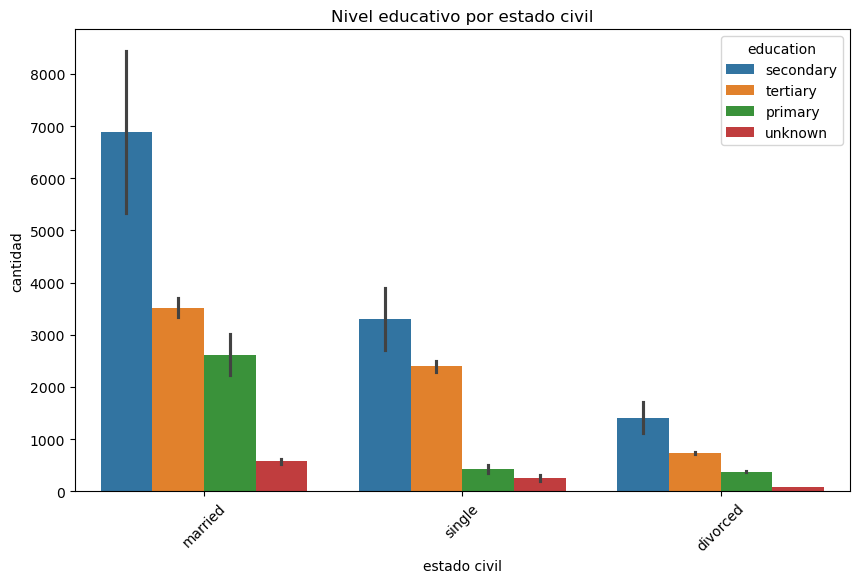

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=hipoteca3, x='marital', y='count', hue='education')
plt.title('Nivel educativo por estado civil')
plt.xlabel('estado civil')
plt.ylabel('cantidad')
plt.xticks(rotation=45)
plt.show()

In [24]:
hipoteca = banco.groupby('marital')[['education','vivienda']].value_counts().reset_index()
hipoteca

,marital,education,vivienda,count
0,divorced,secondary,yes,1704
1,divorced,secondary,no,1111
2,divorced,tertiary,yes,753
3,divorced,tertiary,no,718
4,divorced,primary,no,386
5,divorced,primary,yes,366
6,divorced,unknown,no,85
7,divorced,unknown,yes,84
8,married,secondary,yes,8431
9,married,secondary,no,5339


Con esta tabla podemos distinguir que el sector que mas clientes tiene es el de las personas casadas, con grado escolar de secundaria y con hipoteca, estos datos nos podrian estar indicando la situacion sobre si es conveniente implementar creditos o prospectar a los que no, haria falta verificar los ingresos para tener mayor conocimiento de la situacion

In [25]:
pivot = hipoteca.pivot_table(index='marital', columns=['education','vivienda'], values='count', fill_value=0)
pivot

education primary         secondary         tertiary         unknown       
vivienda       no     yes        no     yes       no     yes      no    yes
marital                                                                    
divorced    386.0   366.0    1111.0  1704.0    718.0   753.0    85.0   84.0
married    2222.0  3024.0    5339.0  8431.0   3702.0  3336.0   630.0  530.0
single      349.0   504.0    2714.0  3903.0   2503.0  2289.0   322.0  206.0

In [26]:
banco.head()

,age,job,marital,education,impago,saldo,vivienda,prestamo_personal,contact,day,month,duration,campaign,pdays,previous,resultado_campaña,dep_plazo
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
banco[['impago','saldo', 'prestamo_personal']].value_counts().sort_values()

impago  saldo  prestamo_personal
yes     16486  yes                     1
no      7813   no                      1
        7818   no                      1
        7821   no                      1
        7822   no                      1
                                    ... 
        4      no                    106
        2      no                    106
        1      no                    156
        0      yes                   511
               no                   2887
Name: count, Length: 9812, dtype: int64

In [28]:
movimientos = banco.groupby(['saldo','impago','prestamo_personal']).size().reset_index(name='count').sort_values(by='count')
movimientos.head()

,saldo,impago,prestamo_personal,count
0,-8019,yes,yes,1
6759,3559,no,yes,1
6758,3559,no,no,1
6756,3557,no,no,1
6754,3554,no,yes,1


In [29]:
movimientos_ordenados = movimientos.pivot_table(index = 'saldo', columns=['impago','prestamo_personal'],values='count', fill_value=0)
movimientos_ordenados

impago              no       yes     
prestamo_personal   no  yes   no  yes
saldo                                
-8019              0.0  0.0  0.0  1.0
-6847              0.0  0.0  0.0  1.0
-4057              1.0  0.0  0.0  0.0
-3372              0.0  0.0  1.0  0.0
-3313              0.0  0.0  0.0  1.0
...                ...  ...  ...  ...
 66721             1.0  0.0  0.0  0.0
 71188             1.0  0.0  0.0  0.0
 81204             2.0  0.0  0.0  0.0
 98417             1.0  0.0  0.0  0.0
 102127            1.0  0.0  0.0  0.0

[7168 rows x 4 columns]

Graficar las diferencias entre las variables y parametros para ver la relacion respecto a cada uno y ver si es posible definir como influye cada uno en los demas

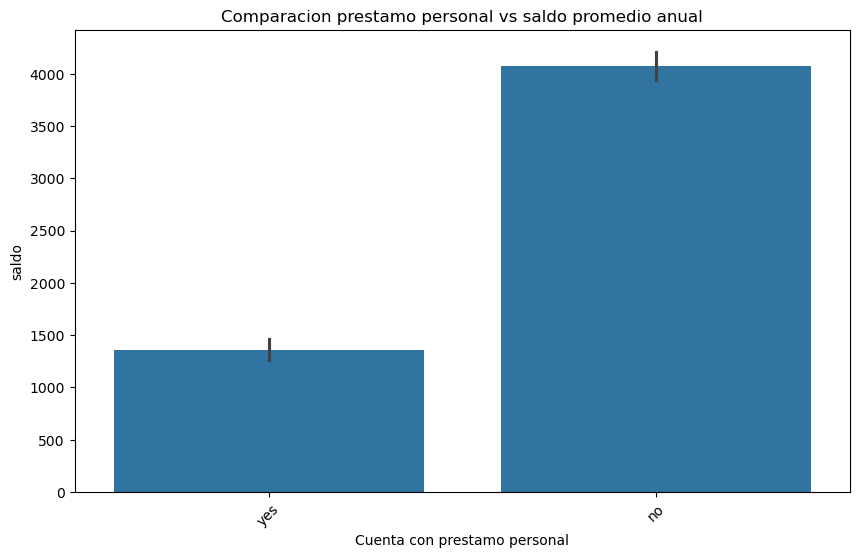

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=movimientos, x='prestamo_personal', y='saldo')
plt.title('Comparacion prestamo personal vs saldo promedio anual')
plt.xlabel('Cuenta con prestamo personal')
plt.ylabel('saldo')
plt.xticks(rotation=45)
plt.show()

-En su mayoria los clientes que cuentan con saldos mas elevados no cuentan con prestamo personal
-Aplicamos OHE para codificar y transformar datos en binarios y poder aplicar algoritmos de clasificacion con esto podemos conocer la tendencia que presentan los clientes

In [31]:
#Duracion vs campaña
banco.head()

,age,job,marital,education,impago,saldo,vivienda,prestamo_personal,contact,day,month,duration,campaign,pdays,previous,resultado_campaña,dep_plazo
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [32]:
banco['duration'] = (banco['duration']/60).round(2)

In [36]:
contacto = banco.groupby(['campaign','duration']).size().reset_index(name='count').sort_values(by='duration')
contacto.head()

,campaign,duration,count
3344,4,0.00,1
1213,2,0.00,1
6719,15,0.00,1
0,1,0.02,2
2391,3,0.03,1


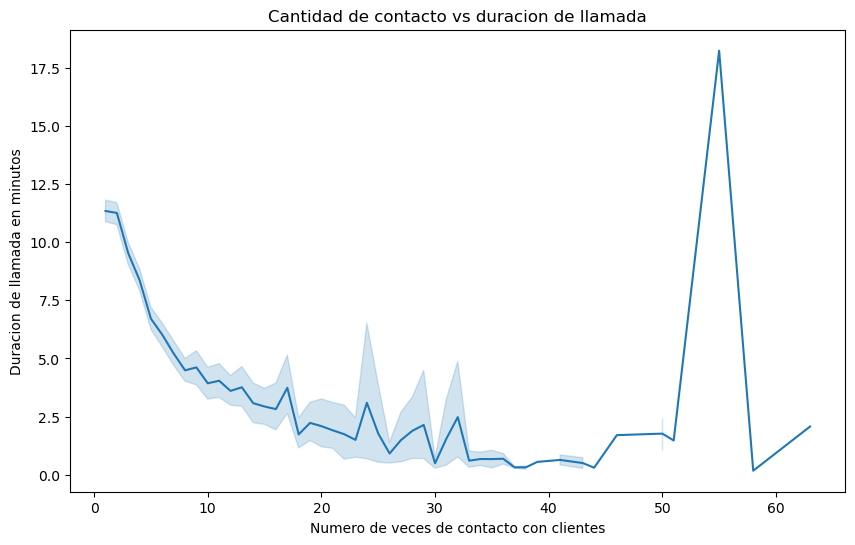

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(data=contacto, x='campaign', y='duration') #hue='count')
plt.title('Cantidad de contacto vs duracion de llamada')
plt.xlabel('Numero de veces de contacto con clientes')
plt.ylabel('Duracion de llamada en minutos')
plt.show()

Edad, estado civil, saldo, empleo, campaign

In [42]:
general.head(2)

,age,marital,saldo,job,campaign
0,58,married,2143,management,1
1,44,single,29,technician,1


Filtramos por tipo de clientes, considerando clientes mayores de 40 años, conocemos la cantidad de vecese que fueron contactados para hacer promocion de campaña publicitaria, unicamente casados, y saldo promedio anual mayor a 5 mil euros, indistintamente el tipo de empleo que tengan o si son jubilados, esto nos podria dar una panoramica mas abirta sobre un cierto publico especifico, que de cierta forma podria indicarnos sus posibilidades de obtener un 

In [78]:
general = banco[['age', 'marital','saldo','job','campaign']]
veces_campaña = general['campaign'][general['campaign'].duplicated()].unique()
rep_campaña = general[general['campaign'].isin(veces_campaña)].sort_values(by='saldo', ascending=False)
rep_campaña.head()
campaign = rep_campaña[(rep_campaña['age']>=28)&(rep_campaña['age']<=60)&(rep_campaña['marital']=='married')&(rep_campaña['saldo']>=5000)&(~rep_campaña['job'].isin(['retired']))].sort_values(by='saldo', ascending=False)
campaign.head()

,age,marital,saldo,job,campaign
26227,59,married,98417,management,5
21192,52,married,66653,blue-collar,3
19420,59,married,64343,admin.,4
12926,56,married,58932,blue-collar,2
920,44,married,58544,admin.,2


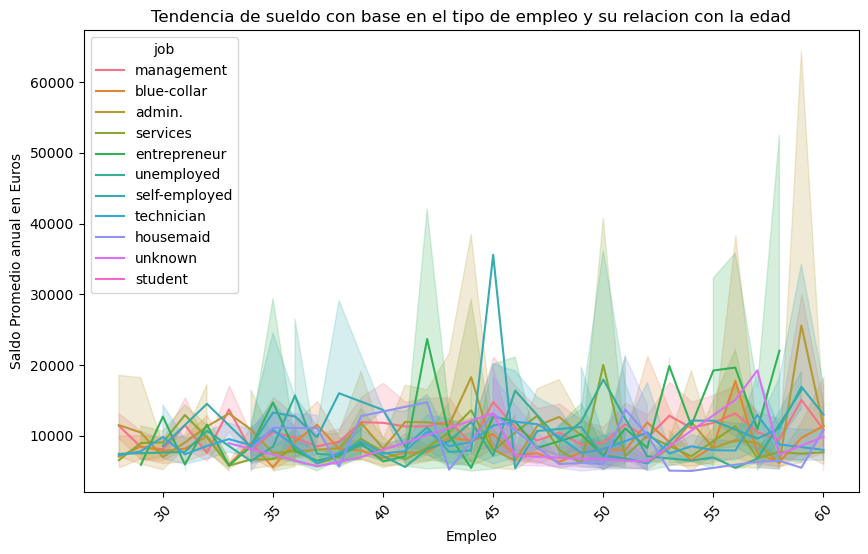

In [80]:
plt.figure(figsize=(10,6))
sns.lineplot(data=campaign, x='age', y='saldo', hue='job')
plt.title('Tendencia de sueldo con base en el tipo de empleo y su relacion con la edad')
plt.xlabel('Empleo')
plt.ylabel('Saldo Promedio anual en Euros')
plt.xticks(rotation=45)
plt.show()

Aplicamos OHE para proceder a aplicar modelos de clasificacion
Regresion Logistica
Arbol de Decision

In [83]:
prediccion = pd.get_dummies(banco, drop_first=True)
prediccion.head()

,age,saldo,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,resultado_campaña_other,resultado_campaña_success,resultado_campaña_unknown,dep_plazo_yes
0,58,2143,5,4.35,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,2.52,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,1.27,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,1.53,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,3.30,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [103]:
#Revisamos si existe desbalance en el conjunto de datos
prediccion['dep_plazo_yes'].value_counts(normalize=True)

dep_plazo_yes
False    0.883015
True     0.116985
Name: proportion, dtype: float64

### Random Forest Classifier

In [104]:
#Dividimos variables predictoras y objetivo
x = prediccion.drop('dep_plazo_yes', axis=1)
y = prediccion['dep_plazo_yes']

#Separamos variables para entrenamiento validacion y prueba
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.20, random_state = 12345)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_val, y_train_val, test_size = 0.25, random_state = 12345)
#x_train, y_train, x_test, y_test = train_test_split(x,y,test_size = 0.20, random_state = 12345)

rfc = RandomForestClassifier(random_state = 12345, n_estimators = 80, class_weight='balanced')
rfc.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=80,
                       random_state=12345)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [116]:
y_valid_pred = rfc.predict(x_valid)
print(f'Accuracy', accuracy_score(y_valid, y_valid_pred))
print(f'ROC_AUC', roc_auc_score(y_valid, y_valid_pred))
print(f'F1_Score', f1_score(y_valid, y_valid_pred))

Accuracy 0.8942711789427118
ROC_AUC 0.630470015301055
F1_Score 0.39722572509457754


In [117]:
y_test_pred = rfc.predict(x_test)
print(f'Accuracy', accuracy_score(y_test, y_test_pred))
print(f'ROC_AUC', roc_auc_score(y_test, y_test_pred))
print(f'F1_Score', f1_score(y_test, y_test_pred))

Accuracy 0.9062258100187991
ROC_AUC 0.6502150029064205
F1_Score 0.4376657824933687


### Logistic Regression

In [121]:
#Dividimos variables predictoras y objetivo
x = prediccion.drop('dep_plazo_yes', axis=1)
y = prediccion['dep_plazo_yes']

#Separamos variables para entrenamiento validacion y prueba
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.20, random_state = 12345)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_val, y_train_val, test_size = 0.25, random_state = 12345)
#x_train, y_train, x_test, y_test = train_test_split(x,y,test_size = 0.20, random_state = 12345)

#Entrenamiento del modelo
lg = LogisticRegression(max_iter=1000, random_state = 42)
lg.fit(x_train, y_train)

C:\Users\dell\anaconda3\envs\vision_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [126]:
#Predicciones
y_pred = lg.predict(x_test)
y_prob = lg.predict_proba(x_test)[:,1]

#Evaluacion
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

       False       0.92      0.98      0.95      8005
        True       0.67      0.32      0.44      1038

    accuracy                           0.90      9043
   macro avg       0.79      0.65      0.69      9043
weighted avg       0.89      0.90      0.89      9043

0.903910609818767


Aplicamos algoritmos de Bosque Aleatorio y Regresion Logistica, en ambos nos dio un porcentaje del 90%, indicando el nivel de precision para determinar la tasa de desercion de los clientes y evitar que estos, en la medida de lo posible cancelen el servicio